<a href="https://colab.research.google.com/github/akshaykulkarni175/Implementation-of-Hyper-Spectral-Image-Classification-using-Hybrid-Spectral-Net-and-Hyper-Spectral-I/blob/main/DSPM_HW1_AkshaySatyabodhaKulkarni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Lifetime Value- HW1

Author: Akshay Satyabodha Kulkarni

In [2]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

!pip install ydata_profiling
from ydata_profiling import ProfileReport



  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 76.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=eed394eb4bb55b98c975d325a21ab0c78a341053d2691590acb7515a62647ff0
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


#Step 1: Understand the df (5 points)


---


The first thing you should do is to load the CSV file and understand the dataset. It is important to
understand the dataset and examine if there is any missing values or outliers before doing analysis. In
this step, you should write Python scripts to answer the following questions.
1. Are there any missing values in the dataset? (0.5)
2. What is the range of dates in the dataset? (1.5)
3. How many unique customers are there in the dataset? (0.5)
4. How many unique orders are there in the dataset? (0.5)
5. Profile the data to give the standard descriptive statistics for the Sales field. What are the min, max,
variance, and standard deviations? (0.5)
6. Do transaction amounts (sales) in general increase over time (perhaps due to inflation)? (1.5)

In [3]:
df = pd.read_csv('customer_sales.csv')
df.describe()

Discount       Profit     Quantity
count  8040.000000  8034.000000  8034.000000
mean      0.112090    34.976226     3.769978
std       0.183016   177.451172     2.201674
min       0.000000 -3060.000000     1.000000
25%       0.000000     1.000000     2.000000
50%       0.000000    14.000000     3.000000
75%       0.100000    47.000000     5.000000
max       0.900000  2476.000000    14.000000

In [4]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#1) Are there any missing values in the dataset?

In [5]:
print("Number of missing values in each column:")
print(df.isnull().sum())

Number of missing values in each column:
Order ID          0
Order Date        6
Customer Name     1
Country           1
State             4
City              4
Region            0
Segment           1
Ship Mode         5
Category          5
Sub-Category      0
Product Name      0
Discount          7
Sales             2
Profit           13
Quantity         13
dtype: int64


In [6]:
df.dropna(inplace=True)

##Dataset has missing values in 13 columns, with Profit and Quantity having the most(13 each).

# 2) What is the range of dates in the dataset? (1.5)

In [7]:
# Convert the Order Date column to datetime
df['Order Date'] = pd.to_datetime(df['Order Date']) #format is mixed
print(df['Order Date'].min())
print(df['Order Date'].max())
print(df['Order Date'].max() - df['Order Date'].min())

2011-01-01 00:00:00
2014-12-31 00:00:00
1460 days 00:00:00


<ipython-input-7-7e078af0e586>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date']) #format is mixed


##The dataset spans from 2011 to 2014 with a range of 1460 days

# 3) How many unique customers are there in the dataset?

In [8]:
print("Number of Unique Customers in the dataset: "+ str(df['Customer Name'].nunique()))

Number of Unique Customers in the dataset: 792


##There are 792 unique customers, as these are based on customer name it might not be accurate as there maybe customers with the same name

# 4) How many unique orders are there in the dataset?

In [9]:
print("Number of Unique Orders in the dataset: "+ str(df['Order ID'].nunique()))

Number of Unique Orders in the dataset: 4103


There are 4103 unique orders in the dataset.

# 5) Profile the data to give the standard descriptive statistics for the Sales field. What are the min, max,variance, and standard deviations?

In [10]:
df['Sales_new'] = (df['Sales'].str.replace('[\$,]', '', regex=True)).astype(float)

In [11]:
sales_stats = df['Sales_new'].describe()
print("\nSales statistics:")
print(sales_stats)


Sales statistics:
count      8013.000000
mean        342.831274
std        3224.110094
min        -110.000000
25%          48.000000
50%         117.000000
75%         314.000000
max      206000.000000
Name: Sales_new, dtype: float64


In [12]:
maxAmount= df['Sales_new'].max()
minAmount= df['Sales_new'].min()
stdAmount= df['Sales_new'].std()
varAmount= df['Sales_new'].var()
print(f'Maximum Transaction Amount: {maxAmount}')
print(f'Minimum Transaction Amount: {minAmount}')
print(f'Standard Deviation in Transaction Amount: {stdAmount}')
print(f'Variance in Transaction Amount: {varAmount}')

Maximum Transaction Amount: 206000.0
Minimum Transaction Amount: -110.0
Standard Deviation in Transaction Amount: 3224.1100943337206
Variance in Transaction Amount: 10394885.900384592


##Maximum Transaction Amount: 206000.0 Minimum Transaction Amount: -110.0 Standard Deviation in Transaction Amount: 3224.1100943337206 Variance in Transaction Amount: 10394885.900384592

##This high variance indicates the presence of some outliers

# 6) Do transaction amounts (sales) in general increase over time (perhaps due to inflation)?

In [13]:
#Filter negative values of amount
df = df[df['Sales_new'] > 0]
df.describe()

Order Date     Discount       Profit     Quantity  \
count                           8009  8009.000000  8009.000000  8009.000000   
mean   2013-04-22 03:28:44.709701632     0.112286    35.021351     3.770258   
min              2011-01-01 00:00:00     0.000000 -3060.000000     1.000000   
25%              2012-06-14 00:00:00     0.000000     1.000000     2.000000   
50%              2013-06-13 00:00:00     0.000000    14.000000     3.000000   
75%              2014-05-02 00:00:00     0.100000    47.000000     5.000000   
max              2014-12-31 00:00:00     0.900000  2476.000000    14.000000   
std                              NaN     0.183154   177.712192     2.200129   

           Sales_new  
count    8009.000000  
mean      343.030840  
min         3.000000  
25%        49.000000  
50%       117.000000  
75%       315.000000  
max    206000.000000  
std      3224.902722

<ipython-input-14-c366cb592859>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Order Date'].dt.year


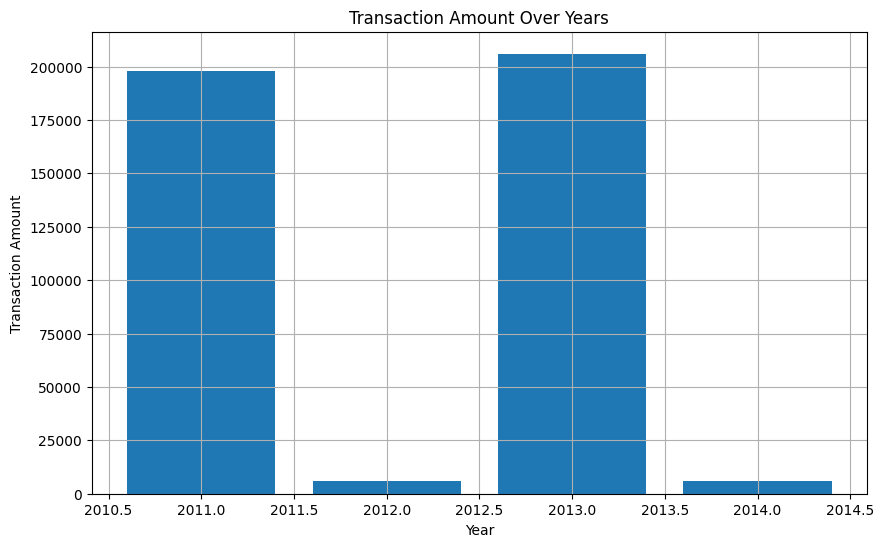

In [14]:
df['Year'] = df['Order Date'].dt.year
plt.figure(figsize=(10, 6))
plt.bar(df['Year'], df['Sales_new'])
plt.xlabel('Year')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount Over Years')
plt.grid(True)
plt.show()

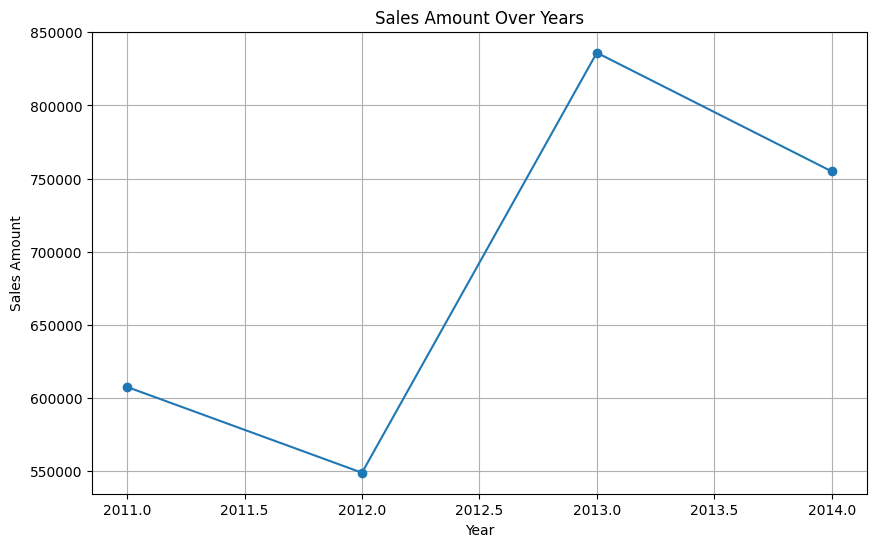

In [15]:
yearly_data = df.groupby('Year')['Sales_new'].sum()
plt.figure(figsize=(10, 6))
plt.plot(yearly_data.index, yearly_data.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Sales Amount')
plt.title('Sales Amount Over Years')
plt.grid(True)
plt.show()

<ipython-input-16-a579ddaf1c16>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Order Date'].dt.year


Yearly average sales:
 Year
2011    426.032959
2012    293.361839
2013    397.914327
2014    289.127920
Name: Sales_new, dtype: float64


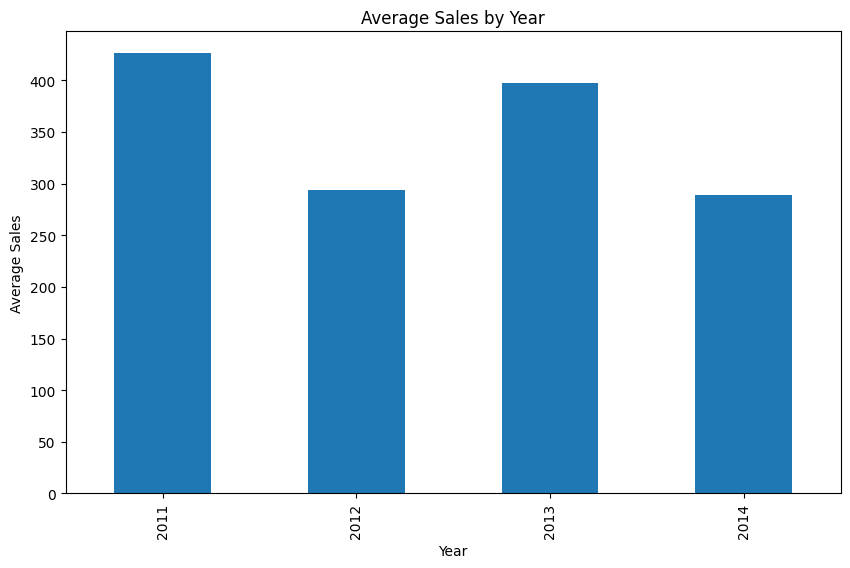

In [16]:
df['Year'] = df['Order Date'].dt.year
yearly_sales = df.groupby('Year')['Sales_new'].mean()
print("Yearly average sales:\n", yearly_sales)

plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='bar')
plt.title('Average Sales by Year')
plt.xlabel('Year')
plt.ylabel('Average Sales')
plt.show()

## Transaction amount increasing steeply from 2012 to 2013 indicating the outlier maybe in this time frame.


#Step 2: Explore the dataset (8 points)

Next, answer a number of preliminary questions before calculating customer lifetime value. In this step,
you should write Python scripts to help you answer the following questions.
1. Are there any outliers or values that don’t make sense? You can use statistical tests to check for
outliers. Or, you can simply plot the histogram of the Sales and see if there is any value that
appears to be abnormal. (Hint, is there any value that appears to be abnormally large or small?
Could it be caused by bad entries (e.g. forgetting a decimal separator?). If there are outliers ,
how would you treat them? (4)
2. Does giving discounts increase sales and/or profits? Make a graph to show that. Comment on
what happens at 80% discount level, and what’s the optimum level for maximizing total profit.
(2)
3. What factors affect the sales the most? You can run a simple regression to understand the
impact. (2

# 1) Are there any outliers or values that don’t make sense? You can use statistical tests to check for outliers. Or, you can simply plot the histogram of the Sales and see if there is any value that appears to be abnormal. (Hint, is there any value that appears to be abnormally large or small? Could it be caused by bad entries (e.g. forgetting a decimal separator?). If there are outliers , how would you treat them? (4)

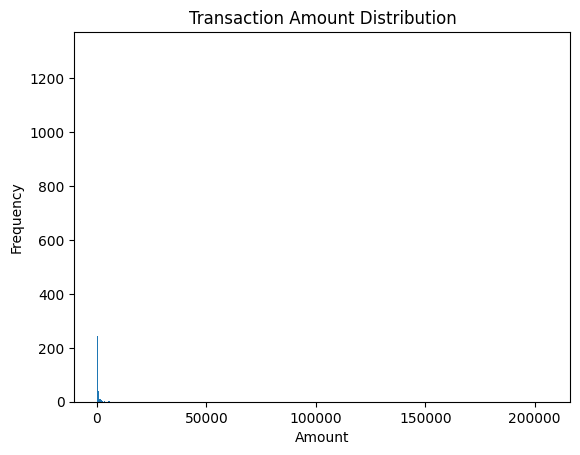

In [17]:
plt.hist(df['Sales_new'], bins= 'auto')
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

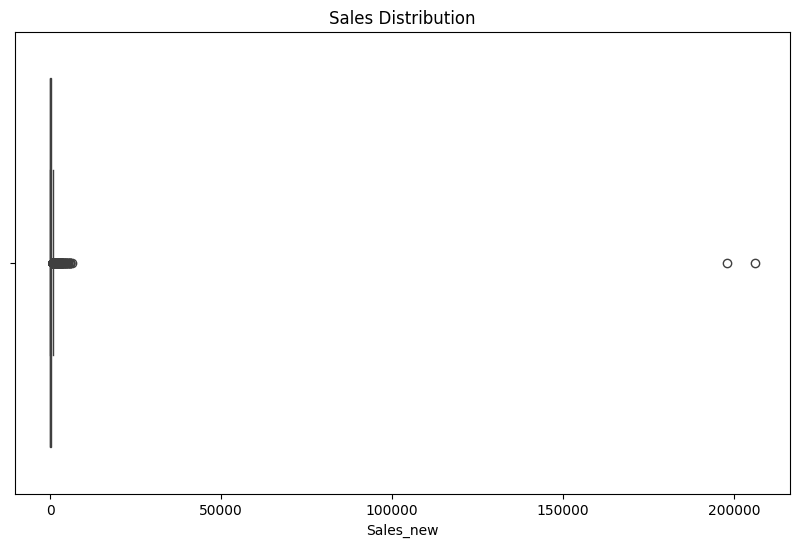

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Sales_new'])
plt.title('Sales Distribution')
plt.show()

In [19]:
Q1 = df['Sales_new'].quantile(0.25)
Q3 = df['Sales_new'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Sales_new'] < lower_bound) | (df['Sales_new'] > upper_bound)]
print(f"Number of potential outliers: {len(outliers)}")

Number of potential outliers: 864


##We can see that there are two extreme outliers from the boxplot. Since there are only 2 outliers which are majorly impacting the data we will remove the two by visualizing the data. Statistical methods show that there are 864 potential outliers which is close to 10% of the data.

In [20]:
df.sort_values(by='Sales_new', ascending=True)

Order ID Order Date    Customer Name         Country  \
2162  BN-2012-8400051 2012-06-29  Kristen Holland          Sweden   
1185  BN-2011-5491702 2011-11-16    Claudia Poore          Sweden   
3388   AZ-2013-273412 2013-01-14   Zachary Warner         Austria   
7097  BN-2014-5531507 2014-09-15     Kayla Tearle          Sweden   
5741  AZ-2014-2672334 2014-02-27   Alexander Bond          France   
...               ...        ...              ...             ...   
7590  AZ-2014-6530154 2014-11-19      Bettie Lang          France   
3196  AZ-2012-9218935 2012-12-13       Lara Giles  United Kingdom   
868   AZ-2011-5313166 2011-09-08   Alexander Bond           Spain   
28    BN-2011-4913858 2011-01-13     Julian Dobie     Netherlands   
5246   AZ-2013-467128 2013-12-04      John Basser         Germany   

                            State          City   Region    Segment  \
2162                    Stockholm         Solna    North   Consumer   
1185                    Stockholm     Stockholm    North  Corporate   
3388                       Vienna        Vienna  Central   Consumer   
7097                    Stockholm     Stockholm    North  Corporate   
5741  Nord-Pas-de-Calais-Picardie     Wasquehal  Central  Corporate   
...                           ...           ...      ...        ...   
7590  Nord-Pas-de-Calais-Picardie         Lille  Central   Consumer   
3196                      England  Huddersfield    North   Consumer   
868                       Galicia          Lugo    South  Corporate   
28                  South Holland     Dordrecht  Central   Consumer   
5246                      Hamburg       Hamburg  Central  Corporate   

         Ship Mode         Category Sub-Category  \
2162       Economy  Office Supplies       Labels   
1185       Economy  Office Supplies      Binders   
3388     Immediate  Office Supplies      Binders   
7097       Economy  Office Supplies       Labels   
5741      Priority  Office Supplies       Labels   
...            ...              ...          ...   
7590       Economy        Furniture       Chairs   
3196       Economy       Technology       Phones   
868   Economy Plus  Office Supplies   Appliances   
28         Economy  Office Supplies      Storage   
5246       Economy  Office Supplies    Envelopes   

                                    Product Name  Discount     Sales  Profit  \
2162  Hon Round Labels, Laser Printer Compatible       0.5        $3    -1.0   
1185          Ibico Hole Reinforcements, Durable       0.5        $4    -2.0   
3388     Wilson Jones Hole Reinforcements, Clear       0.0        $4     0.0   
7097            Hon Removable Labels, Adjustable       0.5        $4    -3.0   
5741              Avery Round Labels, Adjustable       0.0        $5     1.0   
...                                          ...       ...       ...     ...   
7590  Hon Executive Leather Armchair, Adjustable       0.1    $5,729    64.0   
3196              Motorola Smart Phone, Cordless       0.0    $5,785   405.0   
868                 Hamilton Beach Stove, Silver       0.0    $6,517  2476.0   
28                           Smead Lockers, Blue       0.5  $198,000  -131.0   
5246          Kraft Peel and Seal, Security-Tint       0.0  $206,000    33.0   

      Quantity  Sales_new  Year  
2162       1.0        3.0  2012  
1185       1.0        4.0  2011  
3388       1.0        4.0  2013  
7097       1.0        4.0  2014  
5741       1.0        5.0  2014  
...        ...        ...   ...  
7590      14.0     5729.0  2014  
3196       9.0     5785.0  2012  
868       12.0     6517.0  2011  
28         2.0   198000.0  2011  
5246       9.0   206000.0  2013  

[8009 rows x 18 columns]

In [21]:
df= df.iloc[:-2]
df

Order ID Order Date        Customer Name         Country  \
0     BN-2011-7407039 2011-01-01           Ruby Patel          Sweden   
1     AZ-2011-9050313 2011-01-03       Summer Hayward  United Kingdom   
2     AZ-2011-6674300 2011-01-04     Devin Huddleston          France   
3     BN-2011-2819714 2011-01-04          Mary Parker  United Kingdom   
4     BN-2011-2819714 2011-01-04          Mary Parker  United Kingdom   
...               ...        ...                  ...             ...   
8040  AZ-2014-8174835 2014-12-31         Eloise Sykes         Germany   
8041  AZ-2014-7604524 2014-12-31  Rebecca Chamberlain         Germany   
8042   AZ-2014-766953 2014-12-31         Jose Gambino  United Kingdom   
8043  BN-2014-4140795 2014-12-31      Daniel Hamilton     Netherlands   
8044  BN-2014-4140795 2014-12-31      Daniel Hamilton     Netherlands   

                       State        City   Region      Segment     Ship Mode  \
0                  Stockholm   Stockholm    North  Home Office  Economy Plus   
1                    England   Southport    North     Consumer       Economy   
2       Auvergne-Rhône-Alpes     Valence  Central     Consumer       Economy   
3                    England  Birmingham    North    Corporate       Economy   
4                    England  Birmingham    North    Corporate       Economy   
...                      ...         ...      ...          ...           ...   
8040  North Rhine-Westphalia   Bielefeld  Central     Consumer       Economy   
8041                 Hamburg     Hamburg  Central  Home Office       Economy   
8042                 England  Maidenhead    North    Corporate       Economy   
8043           North Brabant   Eindhoven  Central  Home Office  Economy Plus   
8044           North Brabant   Eindhoven  Central  Home Office  Economy Plus   

             Category Sub-Category                           Product Name  \
0     Office Supplies        Paper            Enermax Note Cards, Premium   
1           Furniture    Bookcases     Dania Corner Shelving, Traditional   
2     Office Supplies          Art  Binney & Smith Sketch Pad, Easy-Erase   
3     Office Supplies          Art             Boston Markers, Easy-Erase   
4     Office Supplies      Storage            Eldon Folders, Single Width   
...               ...          ...                                    ...   
8040  Office Supplies     Supplies              Kleencut Shears, Serrated   
8041  Office Supplies      Binders        Wilson Jones Index Tab, Economy   
8042        Furniture    Bookcases   Ikea Stackable Bookrack, Traditional   
8043  Office Supplies          Art      BIC Pencil Sharpener, Fluorescent   
8044  Office Supplies      Binders          Avery Binder Covers, Recycled   

      Discount Sales  Profit  Quantity  Sales_new  Year  
0          0.5   $45   -26.0       3.0       45.0  2011  
1          0.0  $854   290.0       7.0      854.0  2011  
2          0.0  $140    21.0       3.0      140.0  2011  
3          0.5   $27   -22.0       2.0       27.0  2011  
4          0.5   $17    -1.0       2.0       17.0  2011  
...        ...   ...     ...       ...        ...   ...  
8040       0.0  $261    13.0       6.0      261.0  2014  
8041       0.0   $32     8.0       5.0       32.0  2014  
8042       0.0  $245    91.0       2.0      245.0  2014  
8043       0.5   $30   -10.0       2.0       30.0  2014  
8044       0.5   $23    -6.0       4.0       23.0  2014  

[8007 rows x 18 columns]

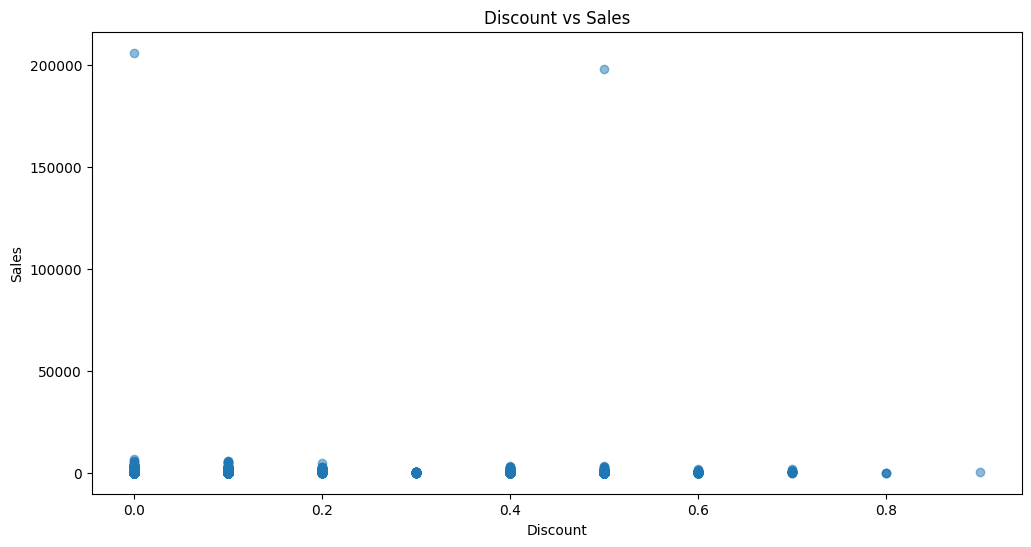

In [22]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Discount'], df['Sales_new'], alpha=0.5)
plt.title('Discount vs Sales')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.show()

# 2) Does giving discounts increase sales and/or profits? Make a graph to show that. Comment on what happens at 80% discount level, and what’s the optimum level for maximizing total profit. (2)

In [23]:
discounts= df.groupby('Discount').agg({'Sales_new': 'sum'}, {'S'}).reset_index()

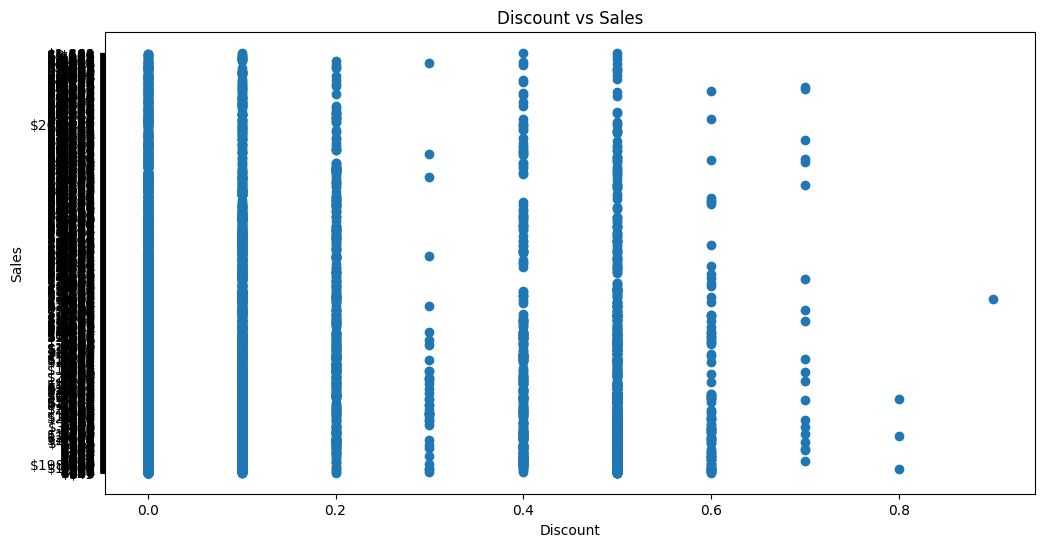

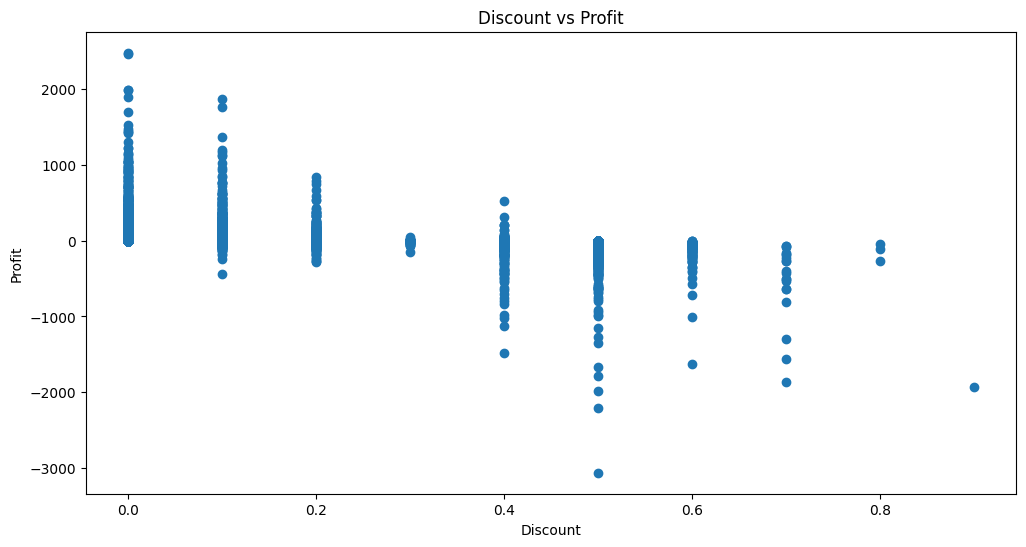

Average profit at 80% or higher discount: -587.75
Optimal discount level for maximizing total profit: 0.0


In [24]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Discount'], df['Sales'])
plt.title('Discount vs Sales')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(df['Discount'], df['Profit'])
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

# Analyze 80% discount level
high_discount = df[df['Discount'] >= 0.8]
print("Average profit at 80% or higher discount:", high_discount['Profit'].mean())

# Find optimal discount level for maximizing total profit
discount_profit = df.groupby('Discount')['Profit'].sum()
optimal_discount = discount_profit.idxmax()
print("Optimal discount level for maximizing total profit:", optimal_discount)


Step 3 last question

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
sales_df = df.copy()
# Prepare features
features = ['Discount', 'Quantity', 'Category', 'Ship Mode']
X = sales_df[features]
y = sales_df['Sales_new']

# One-hot encode categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['Discount', 'Quantity']),
        ('cat', OneHotEncoder(drop='first'), ['Category', 'Ship Mode'])
    ])

X_encoded = preprocessor.fit_transform(X)

# Fit linear regression model
model = LinearRegression()
model.fit(X_encoded, y)

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': preprocessor.get_feature_names_out(),
    'Importance': abs(model.coef_)
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print("Top factors affecting sales:\n", feature_importance.head(10))


Top factors affecting sales:
                          Feature  Importance
2  cat__Category_Office Supplies  279.557109
1                  num__Quantity   96.094928
6        cat__Ship Mode_Priority   86.226433
4    cat__Ship Mode_Economy Plus   59.134537
3       cat__Category_Technology   55.228680
0                  num__Discount   51.501705
5       cat__Ship Mode_Immediate   38.405137


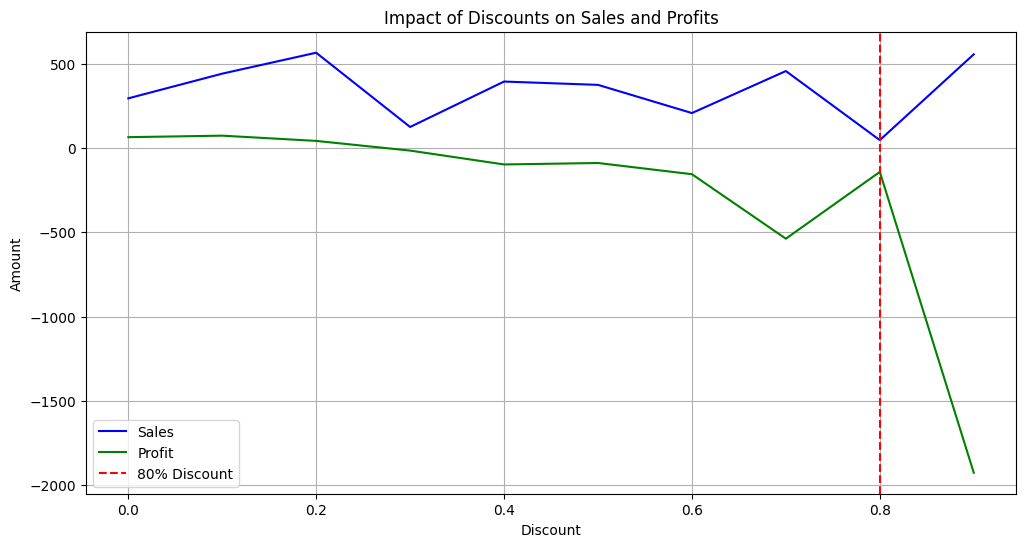

In [26]:
# Group the data by discount level and calculate mean sales and profits
discount_impact = sales_df.groupby('Discount').agg({'Sales_new': 'mean', 'Profit': 'mean'}).reset_index()

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(discount_impact['Discount'], discount_impact['Sales_new'], color='blue', label='Sales')
plt.plot(discount_impact['Discount'], discount_impact['Profit'], color='green', label='Profit')

# Add a vertical line at 80% discount
plt.axvline(x=0.8, color='red', linestyle='--', label='80% Discount')

plt.title('Impact of Discounts on Sales and Profits')
plt.xlabel('Discount')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()

#Discount vs sales and profit

This shows that at 80% discount the sales increase but the profits fall significantly

In [27]:
dfEarlyOrder = df.groupby('Customer Name')['Year'].min()
dfEarlyOrder

Customer Name
Aaron Bootman       2011
Aaron Cunningham    2011
Aaron Davey         2011
Aaron Macrossan     2011
Abbie Perry         2011
                    ... 
Zara Loton          2013
Zara Money          2011
Zoe Lanigan         2011
Zoe Lowin           2011
Zona Meyer          2012
Name: Year, Length: 792, dtype: int32

In [28]:
dfEarlyOrder = dfEarlyOrder.reset_index()
dfEarlyOrder

Customer Name  Year
0       Aaron Bootman  2011
1    Aaron Cunningham  2011
2         Aaron Davey  2011
3     Aaron Macrossan  2011
4         Abbie Perry  2011
..                ...   ...
787        Zara Loton  2013
788        Zara Money  2011
789       Zoe Lanigan  2011
790         Zoe Lowin  2011
791        Zona Meyer  2012

[792 rows x 2 columns]

In [29]:
df_final = pd.merge(df, dfEarlyOrder, on = 'Customer Name', how = 'left')
df_final

Order ID Order Date        Customer Name         Country  \
0     BN-2011-7407039 2011-01-01           Ruby Patel          Sweden   
1     AZ-2011-9050313 2011-01-03       Summer Hayward  United Kingdom   
2     AZ-2011-6674300 2011-01-04     Devin Huddleston          France   
3     BN-2011-2819714 2011-01-04          Mary Parker  United Kingdom   
4     BN-2011-2819714 2011-01-04          Mary Parker  United Kingdom   
...               ...        ...                  ...             ...   
8002  AZ-2014-8174835 2014-12-31         Eloise Sykes         Germany   
8003  AZ-2014-7604524 2014-12-31  Rebecca Chamberlain         Germany   
8004   AZ-2014-766953 2014-12-31         Jose Gambino  United Kingdom   
8005  BN-2014-4140795 2014-12-31      Daniel Hamilton     Netherlands   
8006  BN-2014-4140795 2014-12-31      Daniel Hamilton     Netherlands   

                       State        City   Region      Segment     Ship Mode  \
0                  Stockholm   Stockholm    North  Home Office  Economy Plus   
1                    England   Southport    North     Consumer       Economy   
2       Auvergne-Rhône-Alpes     Valence  Central     Consumer       Economy   
3                    England  Birmingham    North    Corporate       Economy   
4                    England  Birmingham    North    Corporate       Economy   
...                      ...         ...      ...          ...           ...   
8002  North Rhine-Westphalia   Bielefeld  Central     Consumer       Economy   
8003                 Hamburg     Hamburg  Central  Home Office       Economy   
8004                 England  Maidenhead    North    Corporate       Economy   
8005           North Brabant   Eindhoven  Central  Home Office  Economy Plus   
8006           North Brabant   Eindhoven  Central  Home Office  Economy Plus   

             Category Sub-Category                           Product Name  \
0     Office Supplies        Paper            Enermax Note Cards, Premium   
1           Furniture    Bookcases     Dania Corner Shelving, Traditional   
2     Office Supplies          Art  Binney & Smith Sketch Pad, Easy-Erase   
3     Office Supplies          Art             Boston Markers, Easy-Erase   
4     Office Supplies      Storage            Eldon Folders, Single Width   
...               ...          ...                                    ...   
8002  Office Supplies     Supplies              Kleencut Shears, Serrated   
8003  Office Supplies      Binders        Wilson Jones Index Tab, Economy   
8004        Furniture    Bookcases   Ikea Stackable Bookrack, Traditional   
8005  Office Supplies          Art      BIC Pencil Sharpener, Fluorescent   
8006  Office Supplies      Binders          Avery Binder Covers, Recycled   

      Discount Sales  Profit  Quantity  Sales_new  Year_x  Year_y  
0          0.5   $45   -26.0       3.0       45.0    2011    2011  
1          0.0  $854   290.0       7.0      854.0    2011    2011  
2          0.0  $140    21.0       3.0      140.0    2011    2011  
3          0.5   $27   -22.0       2.0       27.0    2011    2011  
4          0.5   $17    -1.0       2.0       17.0    2011    2011  
...        ...   ...     ...       ...        ...     ...     ...  
8002       0.0  $261    13.0       6.0      261.0    2014    2012  
8003       0.0   $32     8.0       5.0       32.0    2014    2011  
8004       0.0  $245    91.0       2.0      245.0    2014    2012  
8005       0.5   $30   -10.0       2.0       30.0    2014    2011  
8006       0.5   $23    -6.0       4.0       23.0    2014    2011  

[8007 rows x 19 columns]

In [30]:
df_final.rename(columns = {'Year_y': 'OriginYear'}, inplace = True)

In [31]:
df_final['CustomerTenure'] = (df_final['Order Date'] - pd.to_datetime(df_final['OriginYear'], format='%Y')).dt.days / 31

In [32]:
def TenureRangeFunc(d):
    if (d['CustomerTenure'] <= 12):
        return 12
    elif (d['CustomerTenure'] > 12 and d['CustomerTenure']<= 24):
        return 24
    elif (d['CustomerTenure'] > 24 and d['CustomerTenure']<= 36):
        return 36
    elif (d['CustomerTenure'] > 36 and d['CustomerTenure']<= 48):
        return 48
    elif (d['CustomerTenure'] > 48 and d['CustomerTenure']<= 60):
        return 60
    else:
        return 72

In [34]:
df_final['CustomerTenureRange'] = df_final.apply(TenureRangeFunc, axis = 1)

In [35]:
trans_amount = df_final.pivot_table(values='Sales_new', index='OriginYear', columns='CustomerTenureRange', aggfunc = 'sum')

In [36]:
df_final['CustomerTenureRange'] = df_final.apply(TenureRangeFunc, axis = 1)

In [37]:
trans_amount = trans_amount.cumsum(axis = 1) # axis = 1 to cumsum over columns
print(trans_amount)

CustomerTenureRange        12        24         36         48
OriginYear                                                   
2011                 609478.0  955733.0  1340314.0  1789401.0
2012                 218287.0  390858.0   583095.0        NaN
2013                 291388.0  358527.0        NaN        NaN
2014                  15336.0       NaN        NaN        NaN


In [38]:
unpivot_trans = trans_amount.reset_index().melt(id_vars=["OriginYear"], var_name="CustomerTenure", value_name="Value")

In [39]:
# finding new customers. where origin year matches the transaction year
df_customer = df_final[df_final['OriginYear'] == df_final['Year_x']]

In [40]:
# A customer may also have multiple purchases within its origin year
df_customer.sort_values(by='Customer Name')

Order ID Order Date  Customer Name         Country  \
234   AZ-2011-9409671 2011-04-04  Aaron Bootman  United Kingdom   
235   AZ-2011-9409671 2011-04-04  Aaron Bootman  United Kingdom   
193   AZ-2011-2169445 2011-03-21  Aaron Bootman           Italy   
192   AZ-2011-2169445 2011-03-21  Aaron Bootman           Italy   
794   AZ-2011-3937280 2011-08-30  Aaron Bootman           Italy   
...               ...        ...            ...             ...   
2237  AZ-2012-5862496 2012-07-24     Zona Meyer          France   
1955  AZ-2012-3229399 2012-06-02     Zona Meyer         Germany   
1954  AZ-2012-3229399 2012-06-02     Zona Meyer         Germany   
2234  AZ-2012-5862496 2012-07-24     Zona Meyer          France   
2235  AZ-2012-5862496 2012-07-24     Zona Meyer          France   

                           State       City   Region    Segment     Ship Mode  \
234                     Scotland  Edinburgh    North   Consumer       Economy   
235                     Scotland  Edinburgh    North   Consumer       Economy   
193                       Sicily    Marsala    South   Consumer      Priority   
192                       Sicily    Marsala    South   Consumer      Priority   
794                       Veneto    Vicenza    South   Consumer  Economy Plus   
...                          ...        ...      ...        ...           ...   
2237  Provence-Alpes-Côte d'Azur       Nice  Central  Corporate       Economy   
1955                Lower Saxony  Oldenburg  Central  Corporate       Economy   
1954                Lower Saxony  Oldenburg  Central  Corporate       Economy   
2234  Provence-Alpes-Côte d'Azur       Nice  Central  Corporate       Economy   
2235  Provence-Alpes-Côte d'Azur       Nice  Central  Corporate       Economy   

             Category  ...                           Product Name Discount  \
234   Office Supplies  ...    Binney & Smith Markers, Fluorescent      0.0   
235   Office Supplies  ...  Novimex Shipping Labels, Alphabetical      0.0   
193        Technology  ...       Apple Office Telephone, Cordless      0.4   
192   Office Supplies  ...           Elite Box Cutter, High Speed      0.0   
794         Furniture  ...             Tenex Light Bulb, Duo Pack      0.0   
...               ...  ...                                    ...      ...   
2237  Office Supplies  ...             Smead Shelving, Wire Frame      0.1   
1955  Office Supplies  ...           Fellowes Folders, Industrial      0.1   
1954  Office Supplies  ...            Advantus Paper Clips, Metal      0.0   
2234  Office Supplies  ...       SanDisk Parchment Paper, Premium      0.0   
2235  Office Supplies  ...                 Fellowes Folders, Blue      0.1   

      Sales Profit  Quantity  Sales_new  Year_x  OriginYear  CustomerTenure  \
234     $51   14.0       2.0       51.0    2011        2011        3.000000   
235     $32   16.0       3.0       32.0    2011        2011        3.000000   
193     $82   14.0       2.0       82.0    2011        2011        2.548387   
192    $105   42.0       3.0      105.0    2011        2011        2.548387   
794     $76    9.0       4.0       76.0    2011        2011        7.774194   
...     ...    ...       ...        ...     ...         ...             ...   
2237   $130   52.0       3.0      130.0    2012        2012        6.612903   
1955    $24    3.0       1.0       24.0    2012        2012        4.935484   
1954    $54   13.0       4.0       54.0    2012        2012        4.935484   
2234    $33    6.0       2.0       33.0    2012        2012        6.612903   
2235    $48   21.0       2.0       48.0    2012        2012        6.612903   

      CustomerTenureRange  
234                    12  
235                    12  
193                    12  
192                    12  
794                    12  
...                   ...  
2237                   12  
1955                   12  
1954                   12  
2234                   12  
2235                   12  

[2460 rows x

In [41]:
df_customer.duplicated(subset = ['Customer Name']).value_counts()

True     1668
False     792
Name: count, dtype: int64

In [42]:
df_cust_noDup = df_customer.drop_duplicates(subset = ['Customer Name'])
new_cust = df_final.groupby('OriginYear')['Customer Name'].nunique()
new_cust

OriginYear
2011    487
2012    207
2013     80
2014     18
Name: Customer Name, dtype: int64

## Step 6: Historic CLV

In [43]:
df_final_trans = unpivot_trans.merge(new_cust, on = 'OriginYear', how = 'left')
#Note: Unpivot by default takes Column name as Customer ID, we need to change it NewCustCount below
df_final_trans.rename(columns = {'Customer Name': 'NewCustCount'}, inplace = True)
df_final_trans

OriginYear CustomerTenure      Value  NewCustCount
0         2011             12   609478.0           487
1         2012             12   218287.0           207
2         2013             12   291388.0            80
3         2014             12    15336.0            18
4         2011             24   955733.0           487
5         2012             24   390858.0           207
6         2013             24   358527.0            80
7         2014             24        NaN            18
8         2011             36  1340314.0           487
9         2012             36   583095.0           207
10        2013             36        NaN            80
11        2014             36        NaN            18
12        2011             48  1789401.0           487
13        2012             48        NaN           207
14        2013             48        NaN            80
15        2014             48        NaN            18

In [44]:
df_final_trans['CLV'] = df_final_trans['Value'] / df_final_trans['NewCustCount']
df_final_trans

OriginYear CustomerTenure      Value  NewCustCount          CLV
0         2011             12   609478.0           487  1251.494867
1         2012             12   218287.0           207  1054.526570
2         2013             12   291388.0            80  3642.350000
3         2014             12    15336.0            18   852.000000
4         2011             24   955733.0           487  1962.490760
5         2012             24   390858.0           207  1888.202899
6         2013             24   358527.0            80  4481.587500
7         2014             24        NaN            18          NaN
8         2011             36  1340314.0           487  2752.184805
9         2012             36   583095.0           207  2816.884058
10        2013             36        NaN            80          NaN
11        2014             36        NaN            18          NaN
12        2011             48  1789401.0           487  3674.334702
13        2012             48        NaN           207          NaN
14        2013             48        NaN            80          NaN
15        2014             48        NaN            18          NaN

In [45]:
CLV_table = df_final_trans.pivot_table(values='CLV', index='OriginYear', columns='CustomerTenure', aggfunc = 'sum')
CLV_table

CustomerTenure           12           24           36           48
OriginYear                                                        
2011            1251.494867  1962.490760  2752.184805  3674.334702
2012            1054.526570  1888.202899  2816.884058     0.000000
2013            3642.350000  4481.587500     0.000000     0.000000
2014             852.000000     0.000000     0.000000     0.000000

<Axes: xlabel='CustomerTenure', ylabel='CLV'>

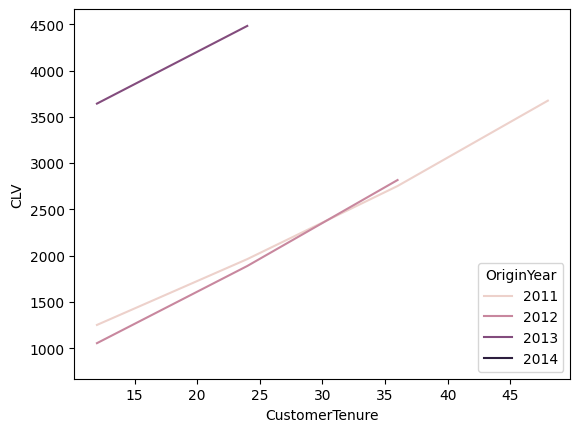

In [46]:
sns.lineplot(x = df_final_trans['CustomerTenure'], y = df_final_trans['CLV'], hue = df_final_trans['OriginYear'])

In [47]:
df_final_trans.groupby('CustomerTenure')['CLV'].mean()

CustomerTenure
12    1700.092859
24    2777.427053
36    2784.534431
48    3674.334702
Name: CLV, dtype: float64

#Interpretation - Step 7: Interpreting your results (1)

1. Customers acquired in 2011 have spent significantly over time. Over the 4 years they have spent the following amounts - $1251.494867, $1962.490760,$2752.184805, $3674.334702

2. Does each group of customers exhibit similar or different patterns of spending? What’s the implication for the business?

> For customers originating in 2011, the CLV rises from $1,251 at 12 months to $3,674 at 48 months, indicating that long-term customers become significantly more valuable over time

> The customers who joined in 2013 have a very high CLV,$3,642 for the first 12 months and reaching $4,481 by 24 months. This means they are of high value and also could mean that the something clicked in 2013 like marketing or awareness.

> The rate of increase in CLV gradually slows down for the 2011 customers which could mean there is a potential downfall in value after the initial period.

The interpretation does not take into consideration the economic effects which could also influence spending.

#Extra Notes
1) The data has two big outliers, this could be the result of a wrong entry like a ',' in place of a '.' but this aspect was ignored as the ',' was removed without considering this.

2) The inter quartile range is pretty small and the number of potential outliers are 864 but only 2 which affected the data majorly are removed.

3) The empty cells were removed, but it could also be checked if the data is important and if we could fill it using any value like mean, median or 0.
